In [39]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [32]:
def plot_first_three_channels(signal_df, subject, data_type):
    """
    Plots the first three channels (data from electrodes) of the EEG signal dataframe
    """

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True, tight_layout=True)

    for i in range(3):
        signal_df.plot(y=signal_df.columns[i], ax=axes[i], title=f"Channel {i+1}", legend=False)
        axes[i].set_xlabel('Sample')
        if i == 0:
            axes[i].set_ylabel('Voltage')

    # plt.tight_layout()
    plt.suptitle(f"Subject {subject} - {data_type} EEG Signals", fontsize=16)

    plt.show()

In [33]:
def filter_signal(signal_df):
    """
    Filters the EEG signal using a Common Average Reference Filter (CAR)
    """

    # Calculate the average across all channels (columns) for each time point (row)
    average_signal = signal_df.mean(axis=1)
    
    # Subtract the average from each channel using broadcasting
    processed_signal_df = signal_df.sub(average_signal, axis=0)

    return processed_signal_df

In [35]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    """
    Design a bandpass filter using the Butterworth filter method
    """
    
    nyq = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Apply a bandpass filter to the data
    """
    
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [36]:
fs = 512 # Sampling frequency in Hz
lowcut_mu = 8
highcut_mu = 13
lowcut_beta = 13
highcut_beta = 30
num_subjects = 3

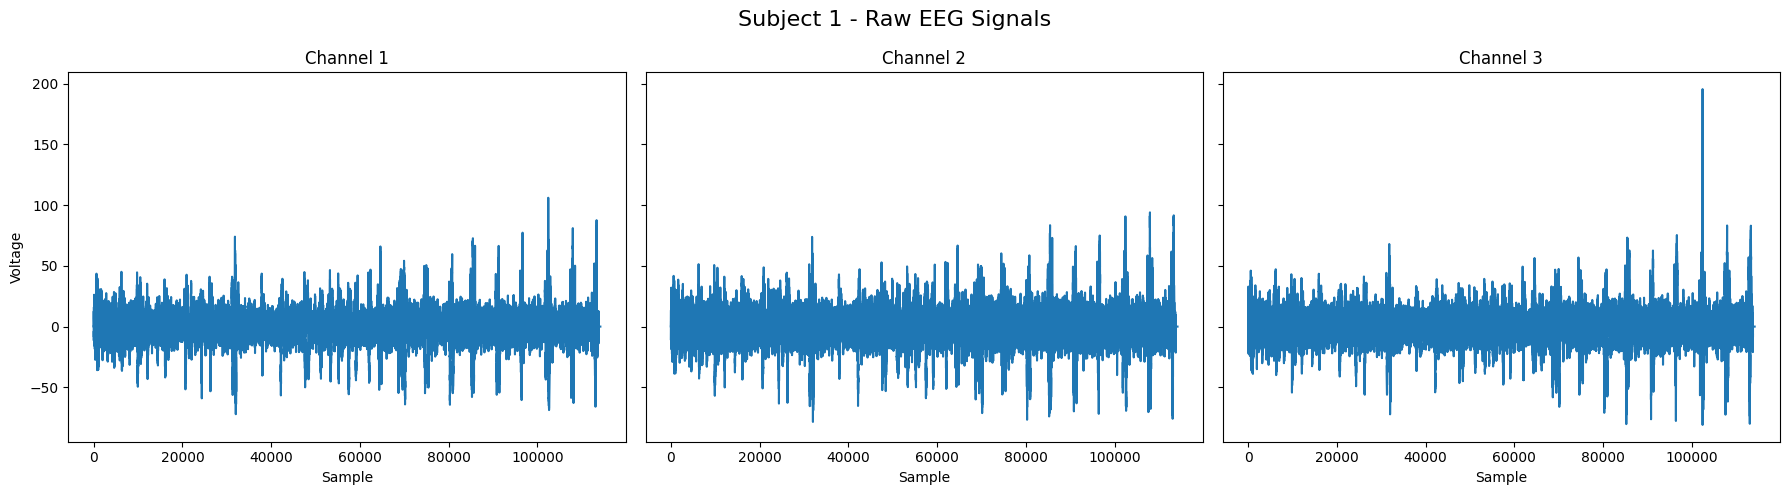

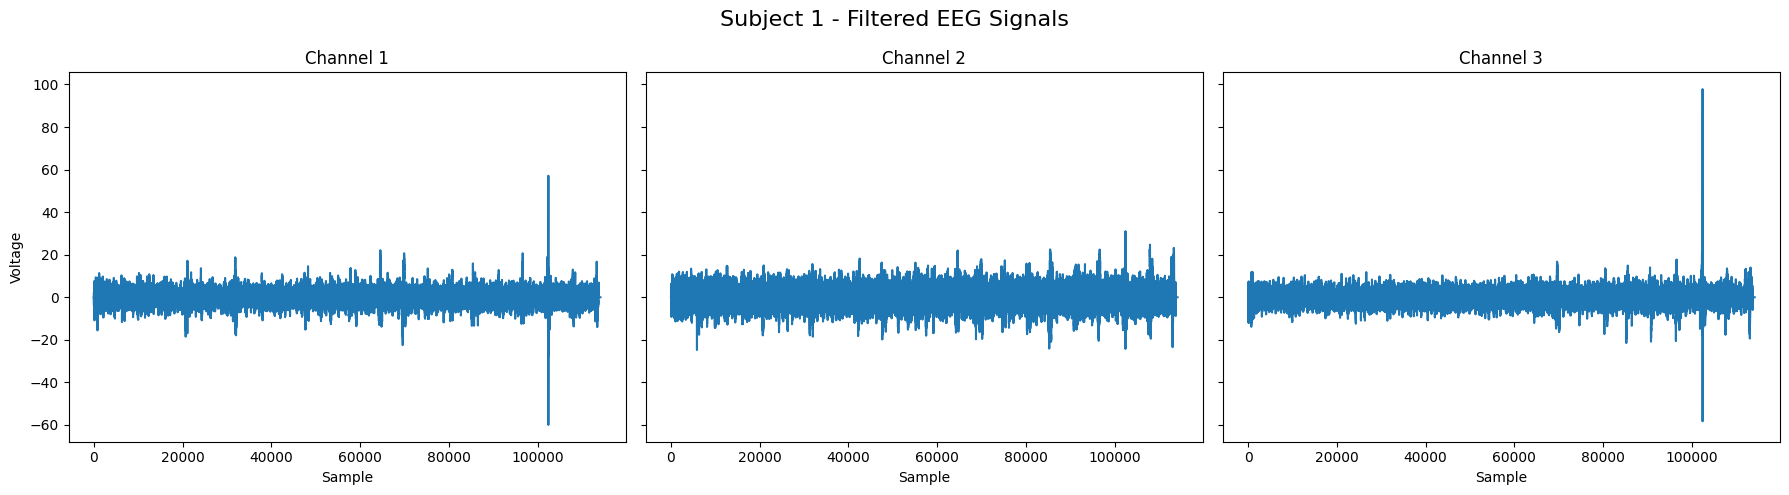

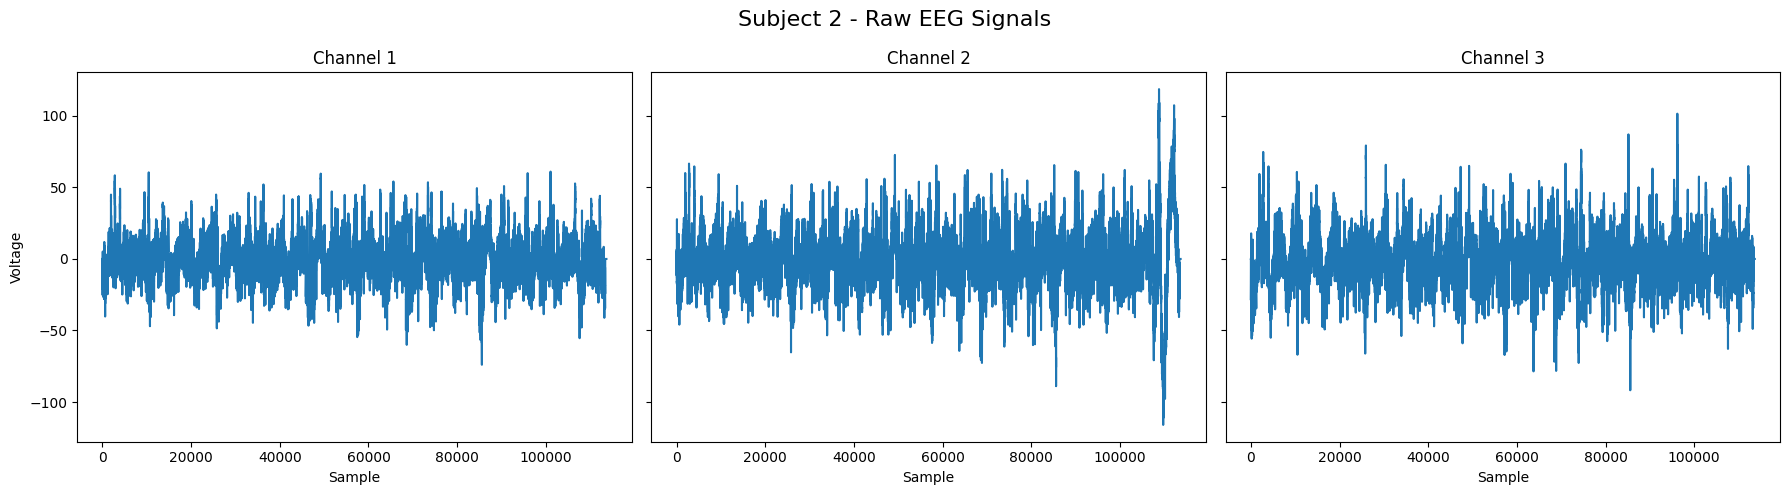

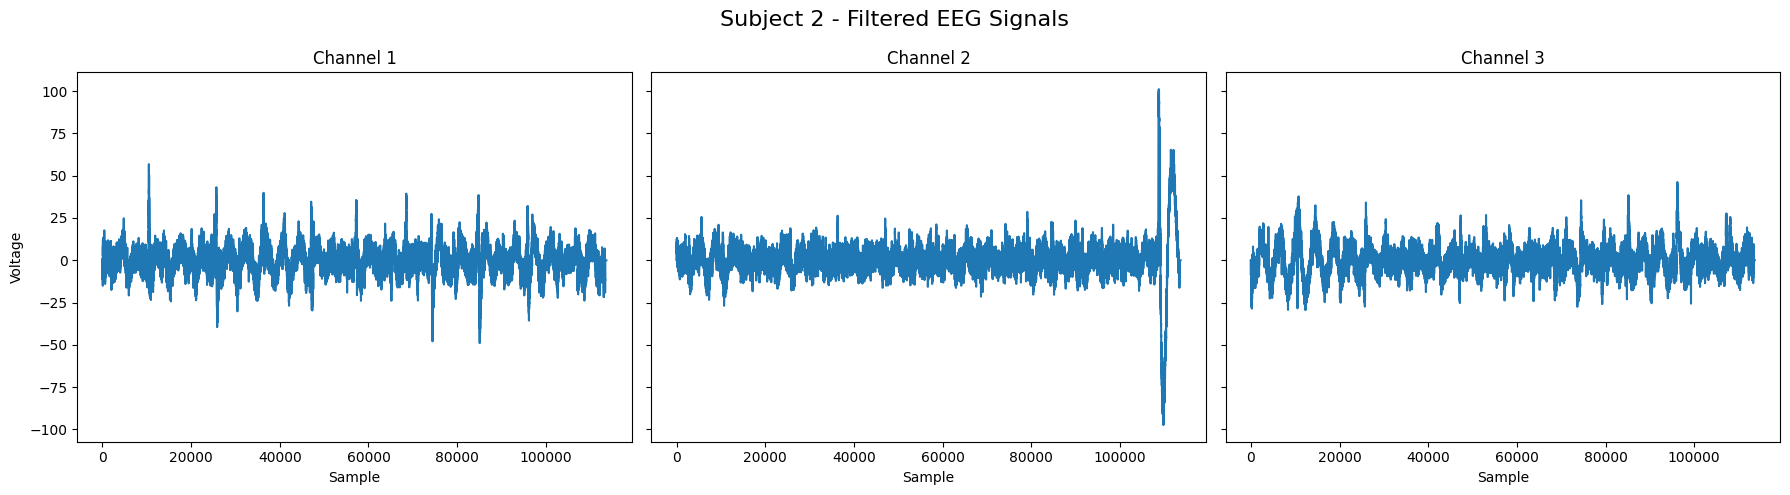

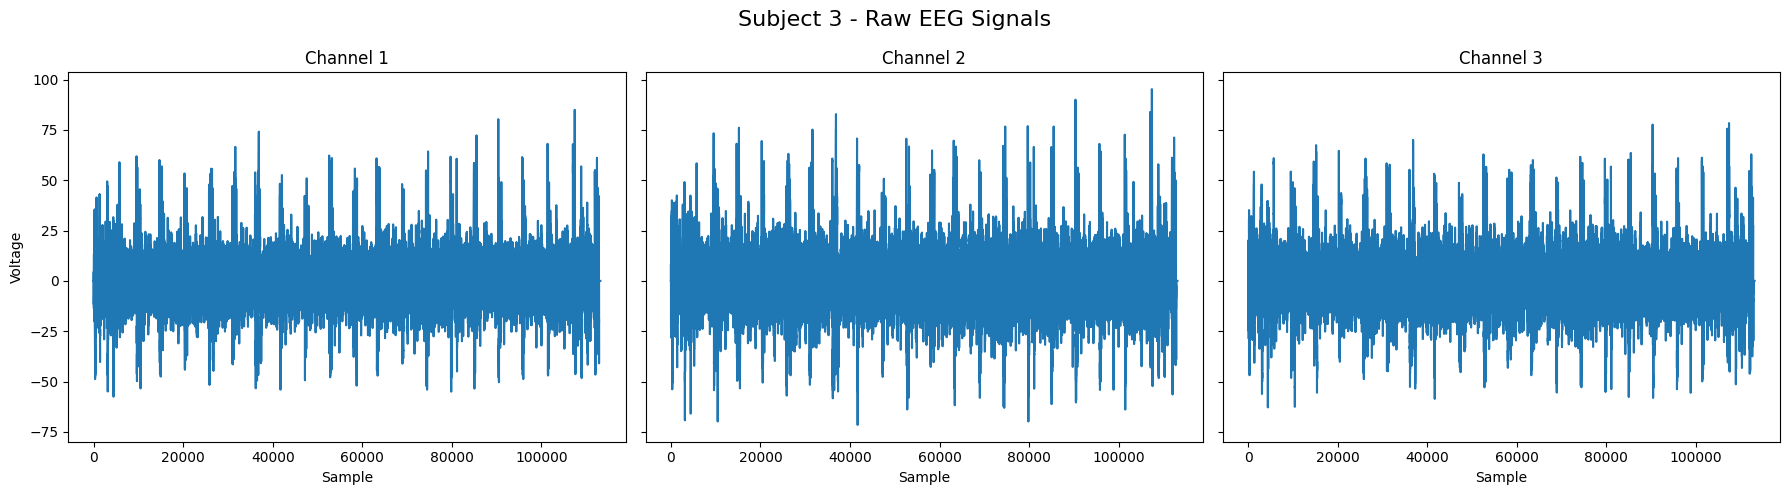

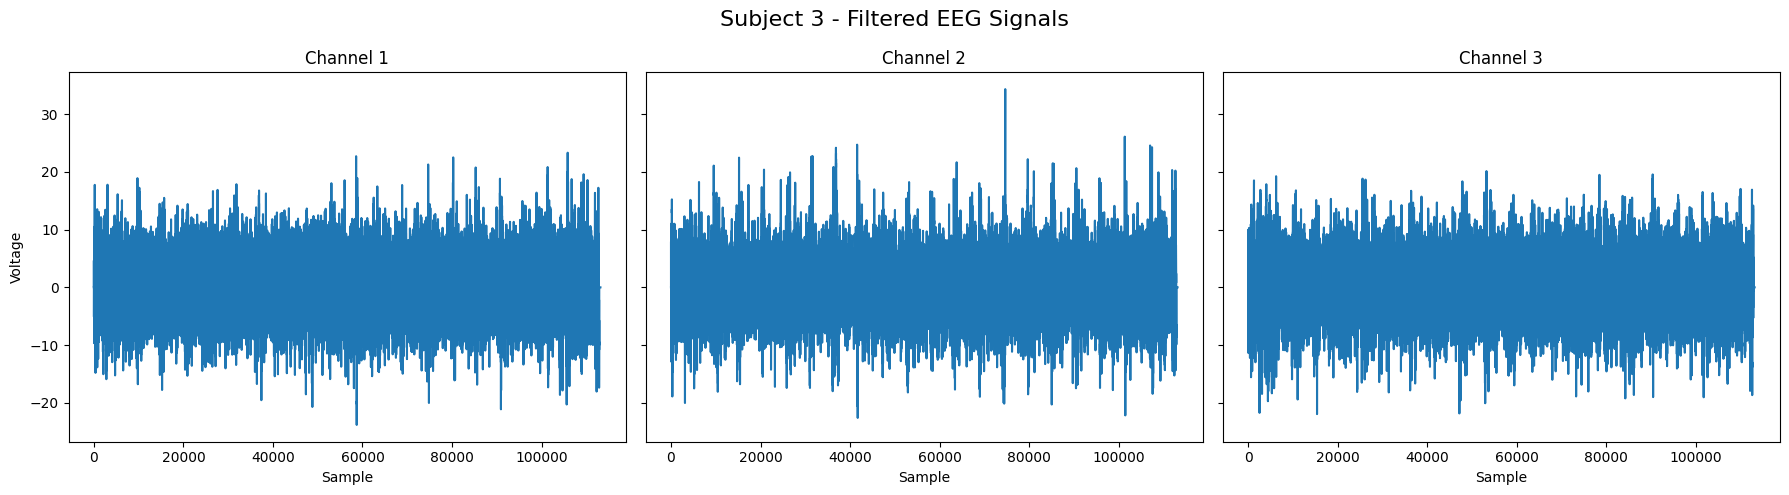

In [37]:
filtered_subjects = []

for subject in range(1, num_subjects+1):
    signals = pd.read_csv(f"../data/raw/subject_{subject}/Subject{subject}_Signals.csv")

    plot_first_three_channels(signals, subject=subject, data_type="Raw")
    
    filtered_signals = filter_signal(signals)
    filtered_subjects.append(filtered_signals)
    filtered_signals.to_csv(f"../data/processed/subject_{subject}/Subject{subject}_Signals_CAR.csv", index=False)

    plot_first_three_channels(filtered_signals, subject=subject, data_type="Filtered")

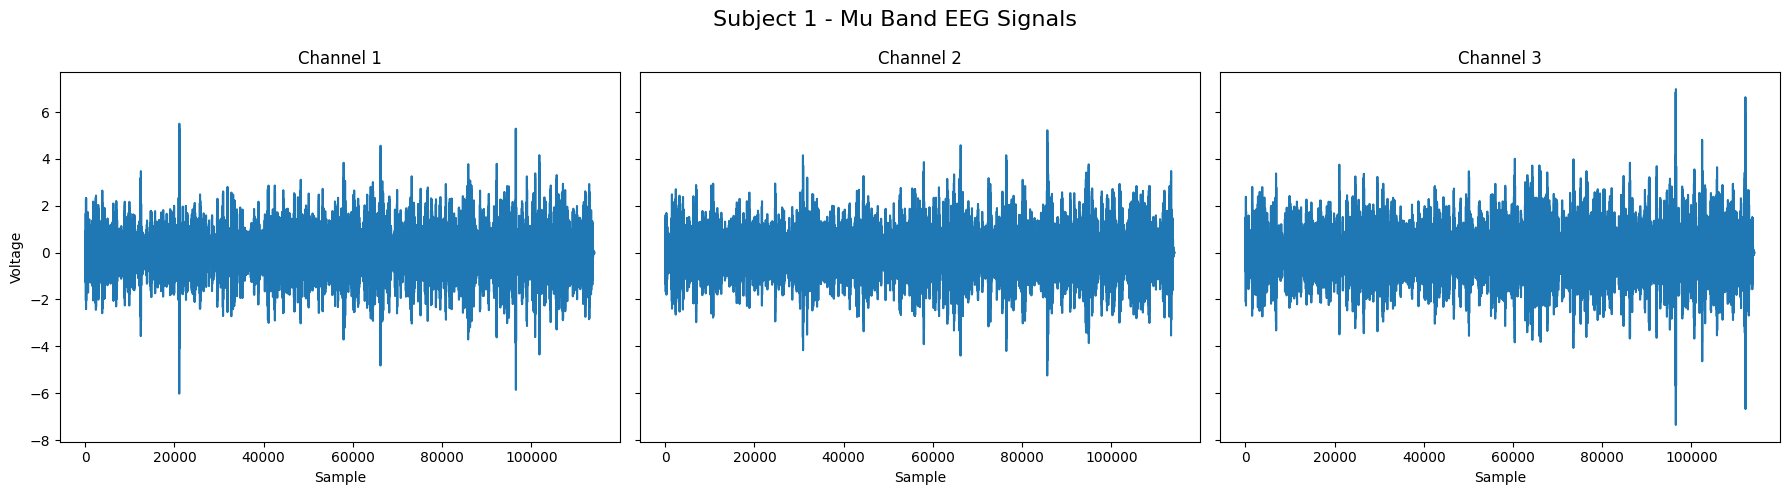

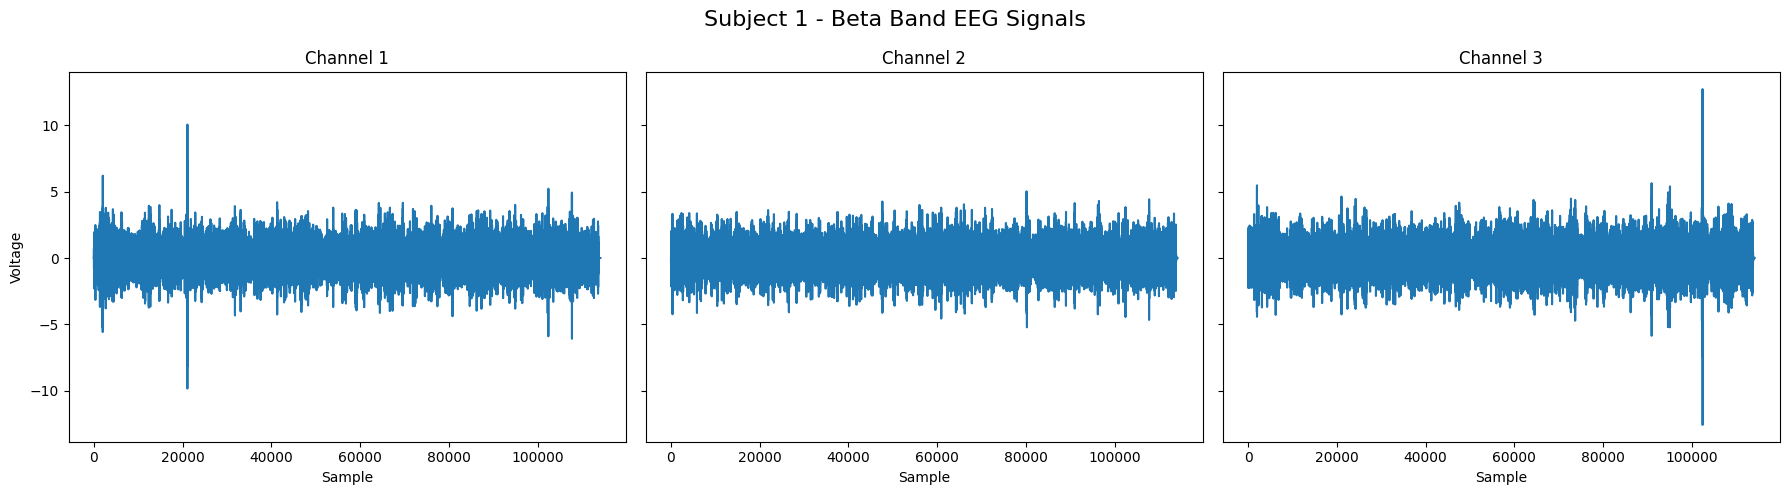

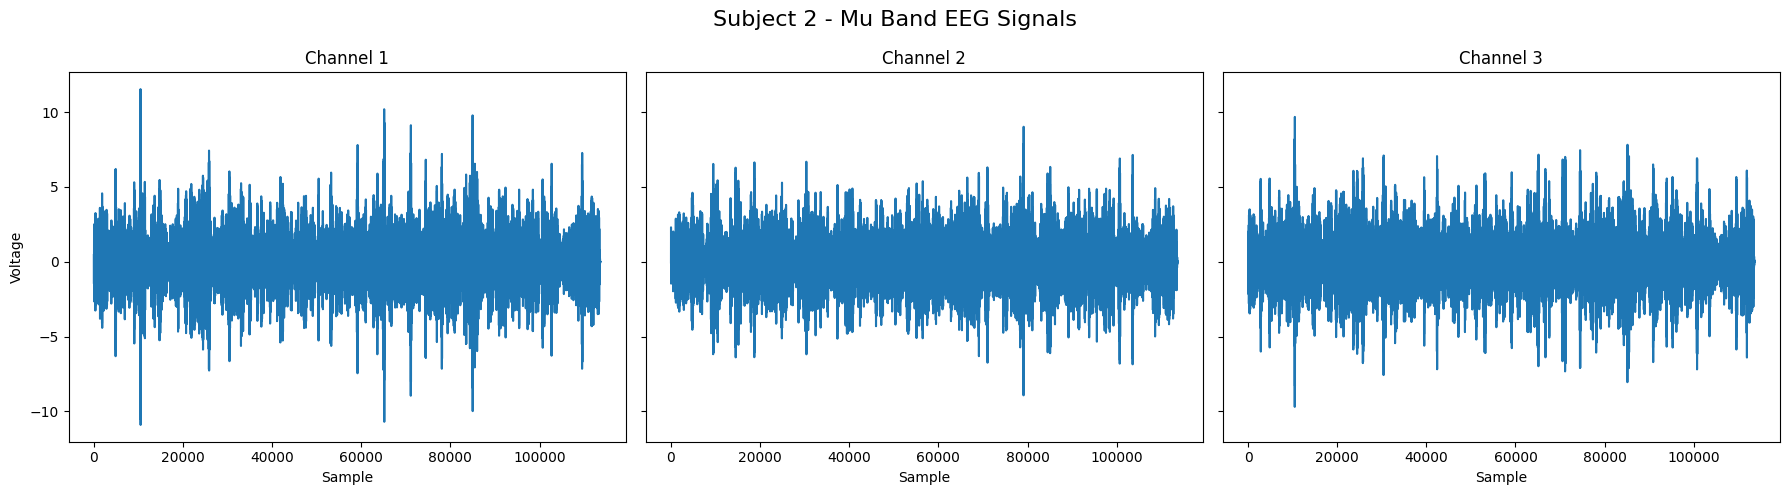

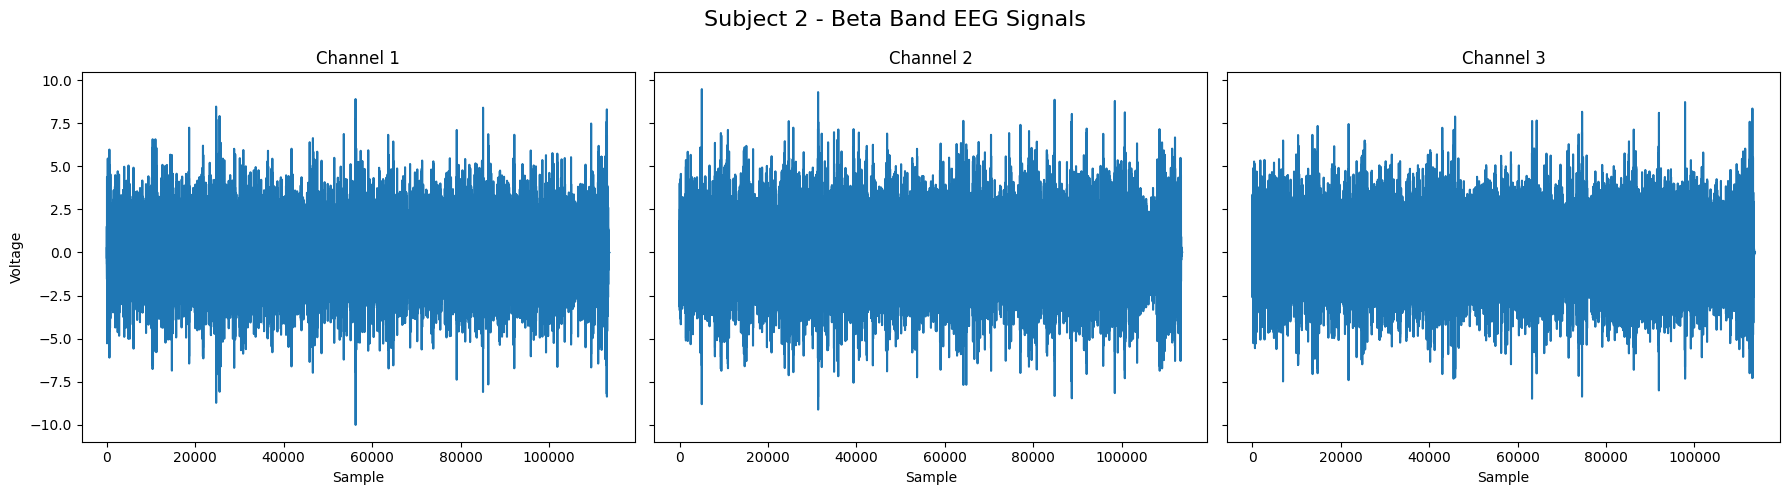

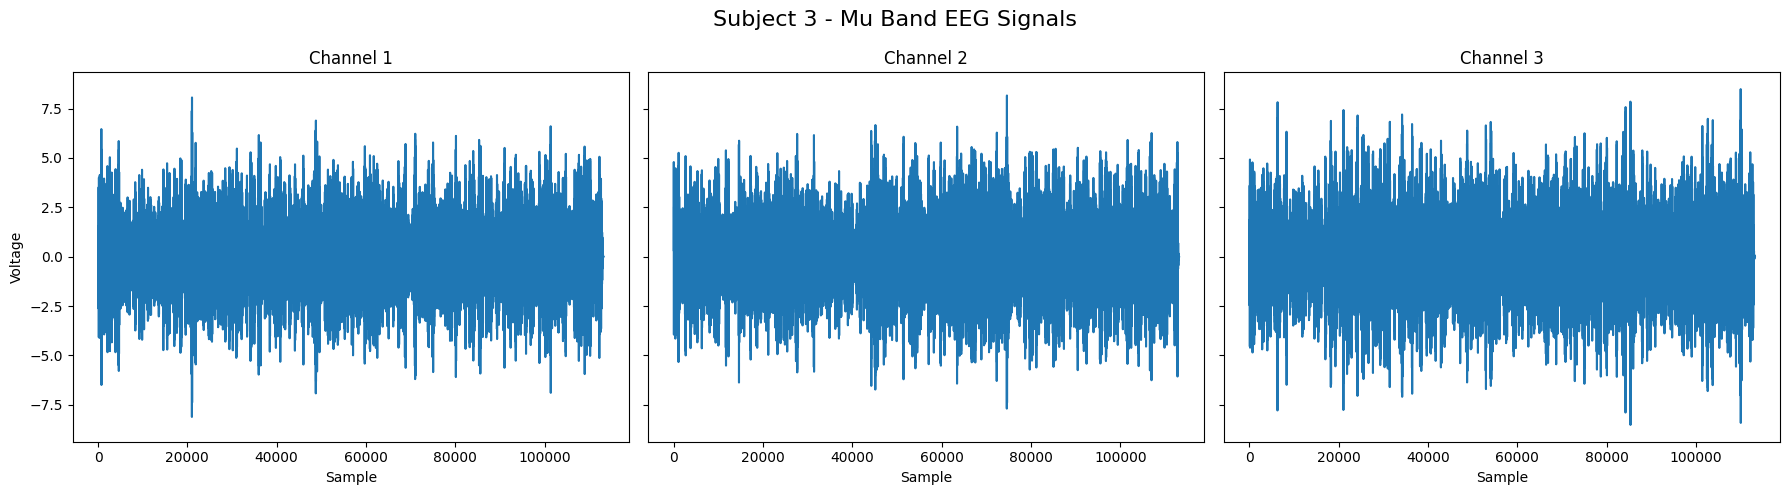

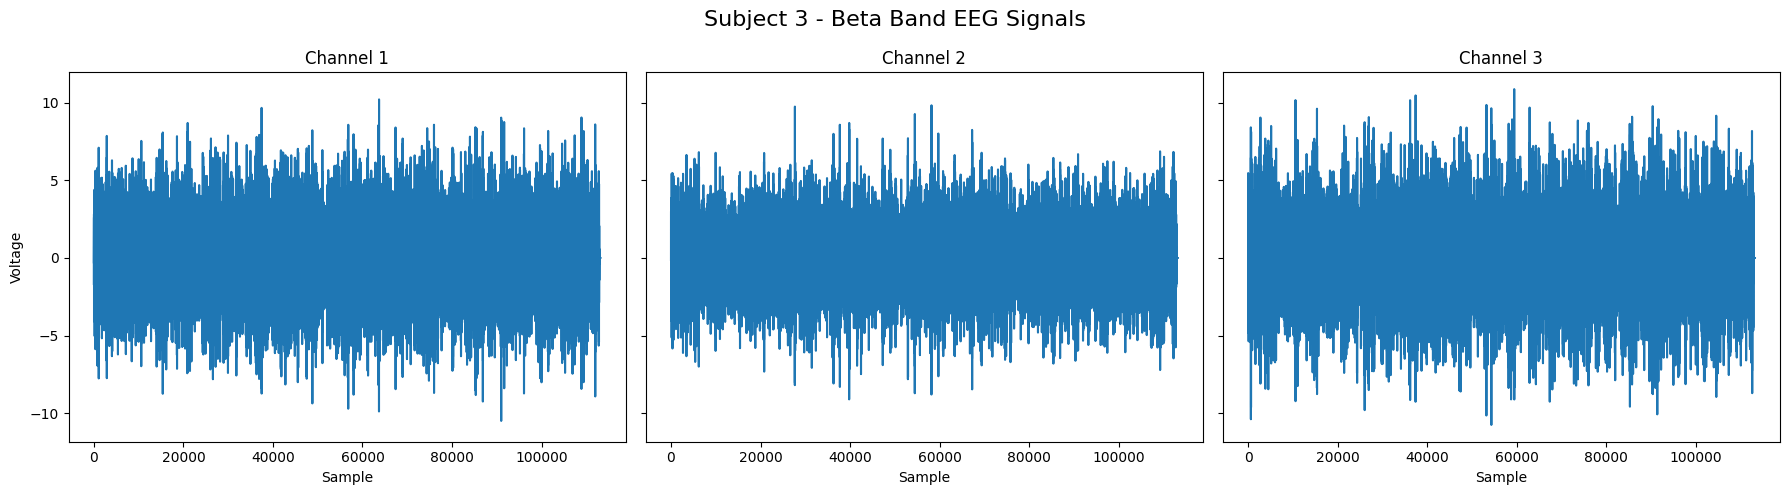

In [41]:
subjects_mu_band_data = []
subjects_beta_band_data = []

for subject, filtered_signals in enumerate(filtered_subjects, 1):
    mu_band_data = filtered_signals.apply(bandpass_filter, args=(lowcut_mu, highcut_mu, fs))
    subjects_mu_band_data.append(mu_band_data)
    mu_band_data.to_csv(f"../data/processed/subject_{subject}/Subject{subject}_Mu_Band.csv", index=False)

    plot_first_three_channels(mu_band_data, subject=subject, data_type="Mu Band")

    beta_band_data = filtered_signals.apply(bandpass_filter, args=(lowcut_beta, highcut_beta, fs))
    subjects_beta_band_data.append(beta_band_data)
    beta_band_data.to_csv(f"../data/processed/subject_{subject}/Subject{subject}_Beta_Band.csv", index=False)

    plot_first_three_channels(beta_band_data, subject=subject, data_type="Beta Band")
    